In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import fits
from sherpa.data import Data2D
from sherpa.models.basic import Gauss2D, Const2D, Box2D
from sherpa.stats import Chi2Gehrels
from sherpa.optmethods import LevMar
from sherpa.fit import Fit
from sherpa.instrument import PSFModel

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


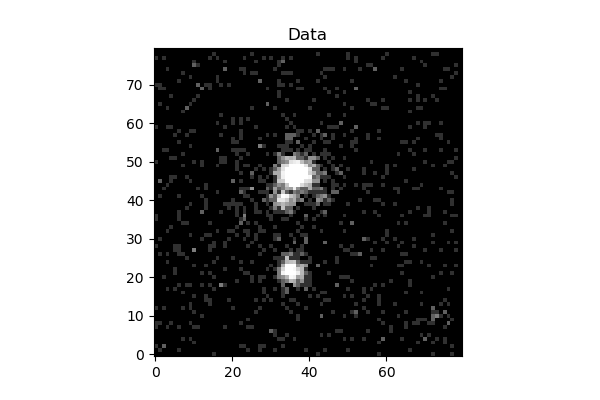

In [3]:
data_img = fits.open('./cxo_data.fits')[0].data
cmap = plt.cm.gray
cmap.set_bad('black')
cmap_norm = colors.LogNorm(vmin=0.5, vmax=20)

fig = plt.figure(figsize=(6,4))
ax = plt.imshow(data_img,cmap=cmap,norm=cmap_norm,origin='lower')
plt.title('Data');

In [4]:
x1,x0 = np.mgrid[:data_img.shape[0],:data_img.shape[1]]
x0axis = x0.ravel()
x1axis = x1.ravel()
yaxis = data_img.ravel()
data = Data2D('img', x0axis, x1axis, yaxis, shape=(data_img.shape[0], data_img.shape[1]))
print(data)

name      = img
x0        = Int64[6400]
x1        = Int64[6400]
y         = Int32[6400]
shape     = (80, 80)
staterror = None
syserror  = None


<IPython.core.display.Javascript object>


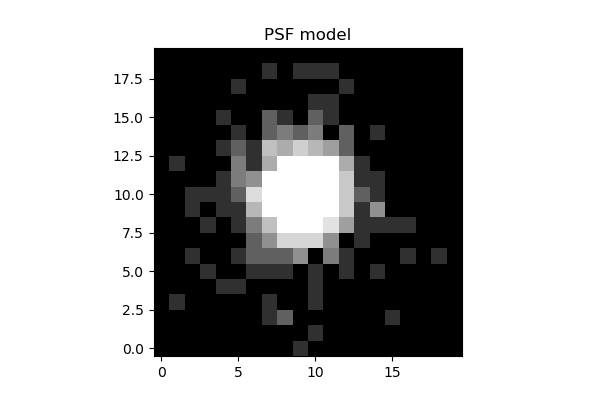

Text(0.5, 1.0, 'PSF model')

In [5]:
psf_img = fits.open('./test_psf.fits')[0].data
fig = plt.figure(figsize=(6,4))
ax = plt.imshow(psf_img,cmap=cmap,norm=cmap_norm,origin='lower')
plt.title('PSF model')

In [6]:
k = psf_img
yg, xg = np.mgrid[:psf_img.shape[0], :psf_img.shape[1]]
kernel = Data2D('kdata', xg.flatten(), yg.flatten(), k.flatten(), shape=k.shape)
psf = PSFModel(kernel=kernel)
print(psf)

psfmodel
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   psfmodel.kernel frozen        kdata
   psfmodel.radial frozen            0            0            1           
   psfmodel.norm frozen            1            0            1           


In [7]:
shift_tolerance = 4.0 # how much can the peaks move around in pixels
box_size = 1.0000001

peak1 = Box2D('peak1')
peak1.xlow = 35.000001
peak1.xhi = peak1.xlow + box_size
peak1.xlow.min = peak1.xlow.val - shift_tolerance
peak1.xlow.max = peak1.xlow.val + shift_tolerance
peak1.ylow = 46.5000001
peak1.yhi = peak1.ylow + box_size
peak1.ylow.min = peak1.ylow.val - shift_tolerance
peak1.ylow.max = peak1.ylow.val + shift_tolerance
peak1.ampl = 7000.0
peak1.ampl.min = 0.0

peak2 = Box2D('peak2')
peak2.xlow = 34.5000001
peak2.xhi = peak2.xlow + box_size
peak2.xlow.min = peak2.xlow.val - shift_tolerance
peak2.xlow.max = peak2.xlow.val + shift_tolerance
peak2.ylow = 21.5000001
peak2.yhi = peak2.ylow + box_size
peak2.ylow.min = peak2.ylow.val - shift_tolerance
peak2.ylow.max = peak2.ylow.val + shift_tolerance
peak2.ampl = 1000.0
peak2.ampl.min = 0.0

peak3 = Box2D('peak3')
peak3.xlow = 32.5000001
peak3.xhi = peak3.xlow + box_size
peak3.xlow.min = peak3.xlow.val - shift_tolerance
peak3.xlow.max = peak3.xlow.val + shift_tolerance
peak3.ylow = 40.1000001
peak3.yhi = peak3.ylow + box_size
peak3.ylow.min = peak3.ylow.val - shift_tolerance
peak3.ylow.max = peak3.ylow.val + shift_tolerance
peak3.ampl = 1000.0
peak3.ampl.min = 0.0

peak4 = Box2D('peak4')
peak4.xlow = 42.6000001
peak4.xhi = peak4.xlow + box_size
peak4.xlow.min = peak4.xlow.val - shift_tolerance
peak4.xlow.max = peak4.xlow.val + shift_tolerance
peak4.ylow = 40.2000001
peak4.yhi = peak4.ylow + box_size
peak4.ylow.min = peak4.ylow.val - shift_tolerance
peak4.ylow.max = peak4.ylow.val + shift_tolerance
peak4.ampl = 1000.0
peak4.ampl.min = 0.0

unconv_model = peak1 + peak2 + peak3 + peak4
print(unconv_model)

(((peak1 + peak2) + peak3) + peak4)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   peak1.xlow   thawed           35           31           39           
   peak1.xhi    linked           36 expr: (peak1.xlow + 1.0000001)           
   peak1.ylow   thawed         46.5         42.5         50.5           
   peak1.yhi    linked         47.5 expr: (peak1.ylow + 1.0000001)           
   peak1.ampl   thawed         7000            0  3.40282e+38           
   peak2.xlow   thawed         34.5         30.5         38.5           
   peak2.xhi    linked         35.5 expr: (peak2.xlow + 1.0000001)           
   peak2.ylow   thawed         21.5         17.5         25.5           
   peak2.yhi    linked         22.5 expr: (peak2.ylow + 1.0000001)           
   peak2.ampl   thawed         1000            0  3.40282e+38           
   peak3.xlow   thawed         32.5         28.5         36.5       

In [8]:
bkg = Const2D('background')
bkg.c0 = 0.0
bkg.c0.min = 0.0
conv_model = psf(unconv_model) + bkg
print(conv_model)

(psfmodel((((peak1 + peak2) + peak3) + peak4)) + background)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   peak1.xlow   thawed           35           31           39           
   peak1.xhi    linked           36 expr: (peak1.xlow + 1.0000001)           
   peak1.ylow   thawed         46.5         42.5         50.5           
   peak1.yhi    linked         47.5 expr: (peak1.ylow + 1.0000001)           
   peak1.ampl   thawed         7000            0  3.40282e+38           
   peak2.xlow   thawed         34.5         30.5         38.5           
   peak2.xhi    linked         35.5 expr: (peak2.xlow + 1.0000001)           
   peak2.ylow   thawed         21.5         17.5         25.5           
   peak2.yhi    linked         22.5 expr: (peak2.ylow + 1.0000001)           
   peak2.ampl   thawed         1000            0  3.40282e+38           
   peak3.xlow   thawed         32.5        

In [9]:
blank = Data2D('blank', x0.flatten(), x1.flatten(), np.ones(x0.flatten().shape), x0.shape)
psf.fold(blank)

In [10]:
fitter = Fit(data, conv_model, stat=Chi2Gehrels(), method=LevMar())
results = fitter.fit()
print(results.message)
print(conv_model)

successful termination
(psfmodel((((peak1 + peak2) + peak3) + peak4)) + background)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   peak1.xlow   thawed           35           31           39           
   peak1.xhi    linked           36 expr: (peak1.xlow + 1.0000001)           
   peak1.ylow   thawed         46.5         42.5         50.5           
   peak1.yhi    linked         47.5 expr: (peak1.ylow + 1.0000001)           
   peak1.ampl   thawed      2513.77            0  3.40282e+38           
   peak2.xlow   thawed         34.5         30.5         38.5           
   peak2.xhi    linked         35.5 expr: (peak2.xlow + 1.0000001)           
   peak2.ylow   thawed         21.5         17.5         25.5           
   peak2.yhi    linked         22.5 expr: (peak2.ylow + 1.0000001)           
   peak2.ampl   thawed      461.487            0  3.40282e+38           
   peak3.xlow   thaw

<IPython.core.display.Javascript object>


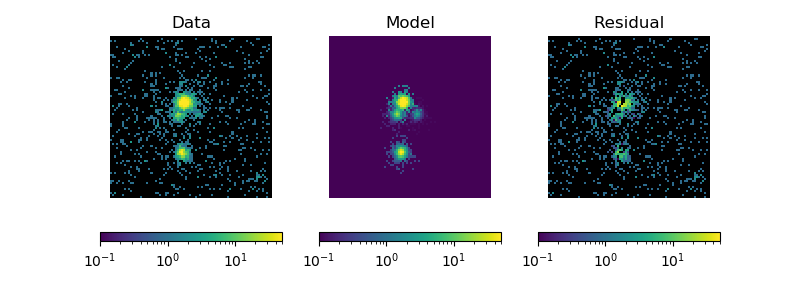

In [11]:
model_predict = conv_model(x0axis, x1axis).reshape(data_img.shape[0], data_img.shape[1])

cmap = plt.cm.viridis
cmap.set_bad('black')
cmap_norm = colors.LogNorm(vmin=0.1, vmax=50)

def pimg(d, title):
    plt.imshow(d, origin='lower', interpolation='nearest',
               cmap=cmap,norm=cmap_norm)
    plt.axis('off')
    plt.colorbar(orientation='horizontal')
    plt.title(title)

plt.figure(figsize=(8, 3))
plt.subplot(1, 3, 1);
pimg(data_img, "Data")
plt.subplot(1, 3, 2)
pimg(model_predict, "Model")
plt.subplot(1, 3, 3)
pimg(data_img - model_predict, "Residual")

In [12]:
print(conv_model)

(psfmodel((((peak1 + peak2) + peak3) + peak4)) + background)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   peak1.xlow   thawed           35           31           39           
   peak1.xhi    linked           36 expr: (peak1.xlow + 1.0000001)           
   peak1.ylow   thawed         46.5         42.5         50.5           
   peak1.yhi    linked         47.5 expr: (peak1.ylow + 1.0000001)           
   peak1.ampl   thawed      2513.77            0  3.40282e+38           
   peak2.xlow   thawed         34.5         30.5         38.5           
   peak2.xhi    linked         35.5 expr: (peak2.xlow + 1.0000001)           
   peak2.ylow   thawed         21.5         17.5         25.5           
   peak2.yhi    linked         22.5 expr: (peak2.ylow + 1.0000001)           
   peak2.ampl   thawed      461.487            0  3.40282e+38           
   peak3.xlow   thawed         32.5        

In [13]:
from sherpa.estmethods import Confidence
fitter.estmethod = Confidence()
print(fitter.estmethod)

name         = confidence
sigma        = 1
eps          = 0.01
maxiters     = 200
soft_limits  = False
remin        = 0.01
fast         = False
parallel     = True
numcores     = 12
maxfits      = 5
max_rstat    = 3
tol          = 0.2
verbose      = False
openinterval = False


In [14]:
errors = fitter.est_errors()

peak1.xlow -: WARNING: The confidence level lies within (3.499750e+01, 3.500000e+01)
peak1.xlow lower bound:	-0.00125209
peak1.ampl lower bound:	-56.7587
peak4.ampl lower bound:	-11.1504
background.c0 lower bound:	-0.0242672
peak2.xlow -: WARNING: The confidence level lies within (3.399826e+01, 3.400076e+01)
peak2.xlow lower bound:	-0.500487
peak3.ampl lower bound:	-18.2891
peak2.ampl lower bound:	-27.6286
peak1.ampl upper bound:	56.7587
peak4.ampl upper bound:	11.1504
peak3.xlow -: WARNING: The confidence level lies within (3.199872e+01, 3.200221e+01)
peak2.ylow -: WARNING: The confidence level lies within (2.099789e+01, 2.100116e+01)
peak4.ylow -: WARNING: The confidence level lies within (3.999934e+01, 4.000310e+01)
peak3.xlow lower bound:	-0.499532
peak2.ylow lower bound:	-0.500477
peak3.ylow -: WARNING: The confidence level lies within (3.999976e+01, 4.000227e+01)
peak4.ylow lower bound:	-0.19878
peak3.ylow lower bound:	-0.0989849
peak3.ampl upper bound:	18.2891
background.c0 uppe